## Seasonal ARIMA

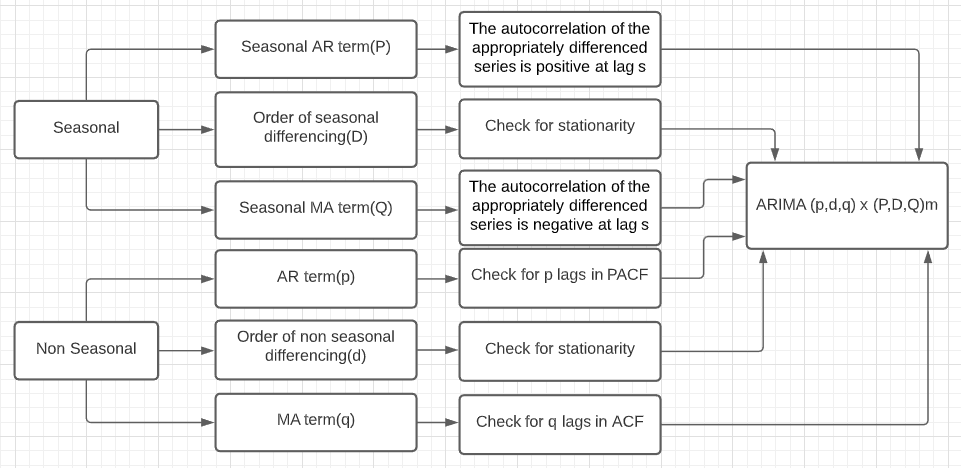

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('/content/perrin-freres-monthly-champagne-.csv')

In [3]:
df.head()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
0,1964-01,2815.0
1,1964-02,2672.0
2,1964-03,2755.0
3,1964-04,2721.0
4,1964-05,2946.0


In [4]:
df.tail()

,Month,Perrin Freres monthly champagne sales millions ?64-?72
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0
105,NaN,NaN
106,Perrin Freres monthly champagne sales millions...,NaN


**Cleaning the data. Drop last two rows**

In [5]:
df.columns=["Month","Sales"]
df.drop(106,axis=0,inplace=True)
df.drop(105,axis=0,inplace=True)

In [6]:
df.tail()

,Month,Sales
100,1972-05,4618.0
101,1972-06,5312.0
102,1972-07,4298.0
103,1972-08,1413.0
104,1972-09,5877.0


**Convert Month into Datetime**


In [7]:
df['Month']=pd.to_datetime(df['Month'])

In [8]:
df.head()

,Month,Sales
0,1964-01-01,2815.0
1,1964-02-01,2672.0
2,1964-03-01,2755.0
3,1964-04-01,2721.0
4,1964-05-01,2946.0


In [9]:
df.set_index('Month',inplace=True)

In [10]:
df.describe()

,Sales
count,105.000000
mean,4761.152381
std,2553.502601
min,1413.000000
25%,3113.000000
50%,4217.000000
75%,5221.000000
max,13916.000000


# Visualize the data

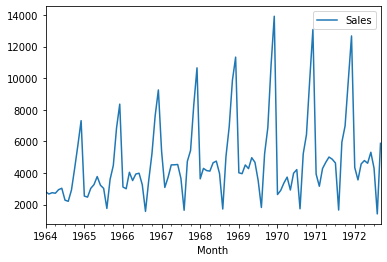

In [11]:
df.plot()

# Testing for Stationarity

**A stationarized series is relatively easy to predict**

**Stationarizing a time series through differencing (where needed) is an important part of the process of fitting an ARIMA model**

**Used ‘adfuller()’ from statsmodels library**

In [12]:
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [13]:
test_result=adfuller(df['Sales'])

In [14]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adfuller_test(df['Sales'])

ADF Test Statistic : -1.8335930563276193
p-value : 0.36391577166024686
#Lags Used : 11
Number of Observations Used : 93
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


# Differencing

In [16]:
df['fd'] = df['Sales'] - df['Sales'].shift(1)

In [17]:
adfuller_test(df['fd'].dropna())

ADF Test Statistic : -7.189896448050998
p-value : 2.519620447387099e-10
#Lags Used : 11
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


# Seasonal Differencing



In [18]:
df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)

In [19]:
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -7.626619157213166
p-value : 2.0605796968136632e-11
#Lags Used : 0
Number of Observations Used : 92
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [20]:
df.head(20)

,Sales,fd,Seasonal First Difference
Month,,,
1964-01-01,2815.0,NaN,NaN
1964-02-01,2672.0,-143.0,NaN
1964-03-01,2755.0,83.0,NaN
1964-04-01,2721.0,-34.0,NaN
1964-05-01,2946.0,225.0,NaN
1964-06-01,3036.0,90.0,NaN
1964-07-01,2282.0,-754.0,NaN
1964-08-01,2212.0,-70.0,NaN
1964-09-01,2922.0,710.0,NaN


# Visualize the Seasonal First Difference

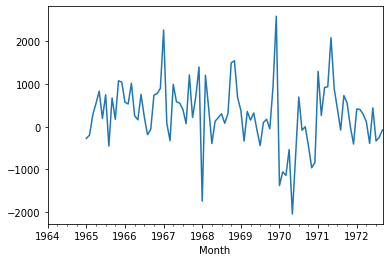

In [21]:
df['Seasonal First Difference'].plot()

# ACF and PACF

In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [23]:
import statsmodels.api as sm

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


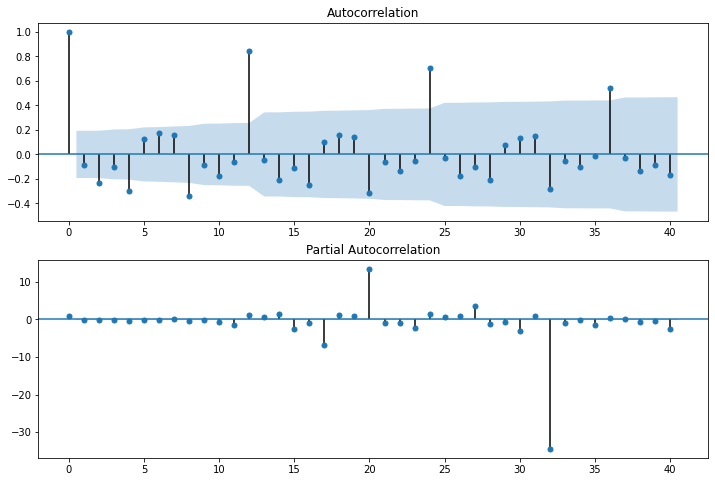

In [24]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['fd'].iloc[1:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['fd'].iloc[1:],lags=40,ax=ax2)

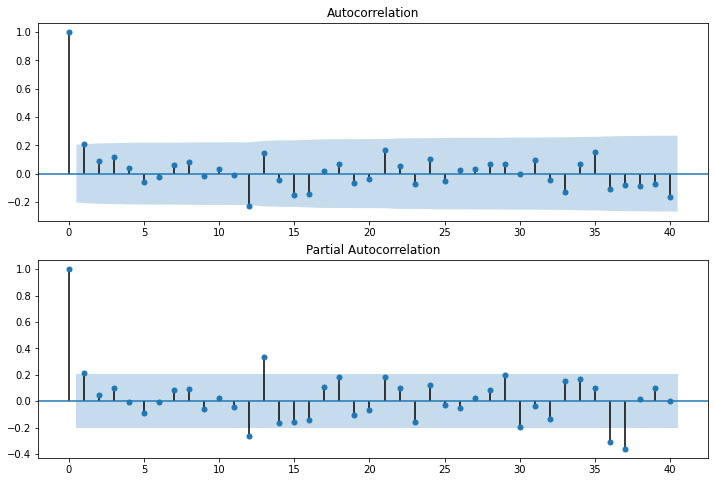

In [25]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

# Estimating the Models

In [26]:
from statsmodels.tsa.arima_model import ARIMA

In [27]:
import statsmodels.api as sm

In [28]:
model1=sm.tsa.statespace.SARIMAX(df['Sales'][:95],order=(0, 1, 1),seasonal_order=(0,1,0,12))
results1=model1.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [29]:
model2=sm.tsa.statespace.SARIMAX(df['Sales'][:95],order=(0, 1, 1),seasonal_order=(0,1,1,12))
results2=model2.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [30]:
model3=sm.tsa.statespace.SARIMAX(df['Sales'][:95],order=(0, 1, 1),seasonal_order=(1,1,0,12))
results3=model3.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [31]:
model4=sm.tsa.statespace.SARIMAX(df['Sales'][:95],order=(0, 1, 1),seasonal_order=(1,1,1,12))
results4=model4.fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


# Visualizing the models

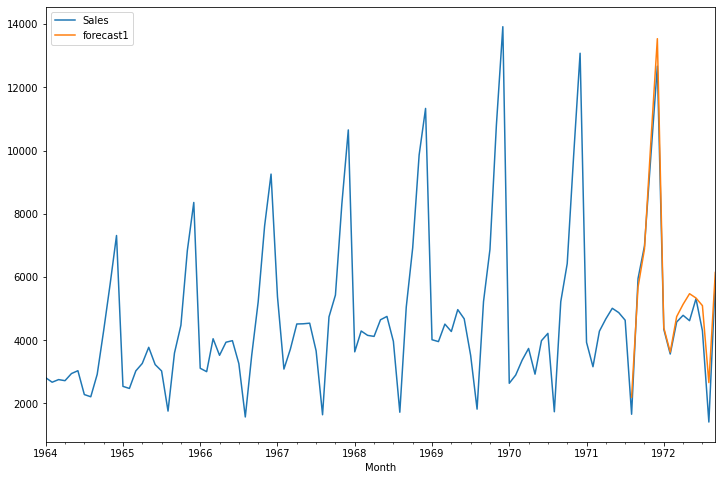

In [32]:
df['forecast1']=results1.predict(start=91,end=105,dynamic=True)
df[['Sales','forecast1']].plot(figsize=(12,8))

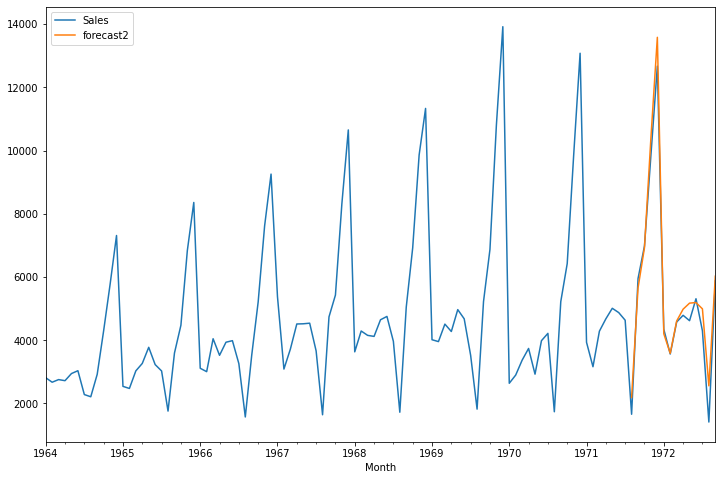

In [33]:
df['forecast2']=results2.predict(start=91,end=105,dynamic=True)
df[['Sales','forecast2']].plot(figsize=(12,8))

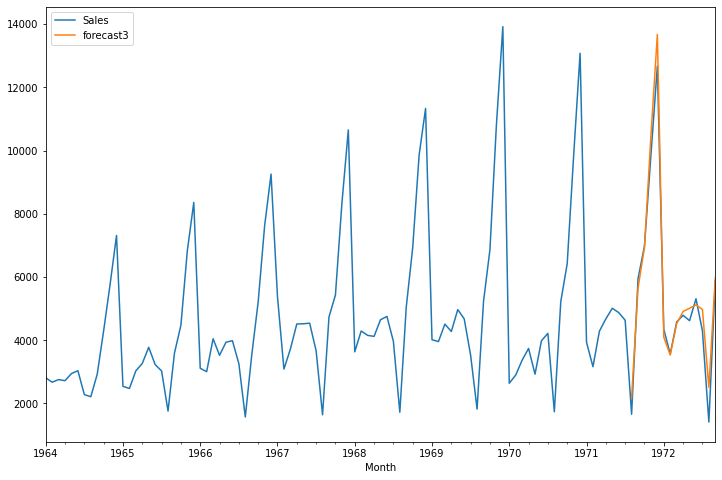

In [34]:
df['forecast3']=results3.predict(start=91,end=105,dynamic=True)
df[['Sales','forecast3']].plot(figsize=(12,8))

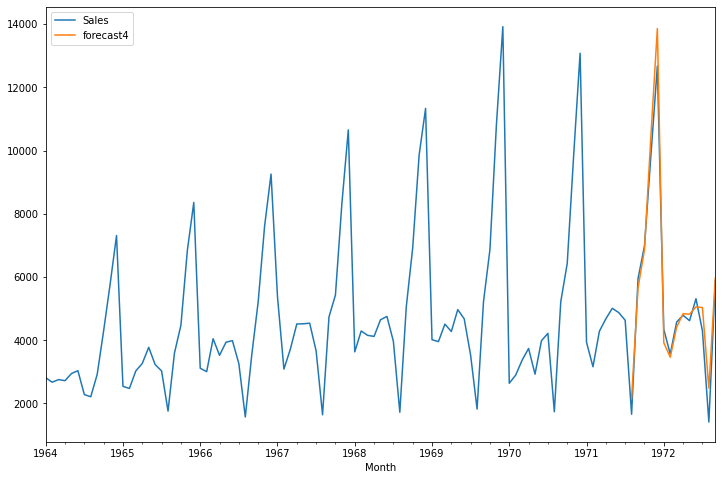

In [35]:
df['forecast4']=results4.predict(start=91,end=105,dynamic=True)
df[['Sales','forecast4']].plot(figsize=(12,8))

# MAPE

MAPE = mean(abs(true - prediction / true) * 100)


In [36]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true) * 100)

In [37]:
df['result1'] = results1.predict(start=96,end=105,dynamic=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [38]:
df['result2'] = results2.predict(start=96,end=105,dynamic=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [39]:
df['result3'] = results3.predict(start=96,end=105,dynamic=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [40]:
df['result4'] = results4.predict(start=96,end=105,dynamic=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


**MAPE values for different models**

ARIMA(0,1,1) x (0,1,0)12  -  10.740220355044245

ARIMA(0,1,1) x (0,1,1)12  -   9.712296313663494

ARIMA(0,1,1) x (1,1,0)12  -   9.656809808757522

ARIMA(0,1,1) x (1,1,1)12  -   10.248684279552528


In [41]:
print('MAPE for ARIMA(0,1,1)x(0,1,0)12',mean_absolute_percentage_error(df['Sales'][96:],df['result1'][96:]))

MAPE for ARIMA(0,1,1)x(0,1,0)12 10.740220355044245


In [42]:
print('MAPE for ARIMA(0,1,1)x(0,1,1)12',mean_absolute_percentage_error(df['Sales'][96:],df['result2'][96:]))

MAPE for ARIMA(0,1,1)x(0,1,1)12 9.712296313663494


In [43]:
print('MAPE for ARIMA(0,1,1)x(1,1,0)12',mean_absolute_percentage_error(df['Sales'][96:],df['result3'][96:]))

MAPE for ARIMA(0,1,1)x(1,1,0)12 9.656809808757522


In [44]:
print('MAPE for ARIMA(0,1,1)x(1,1,1)12',mean_absolute_percentage_error(df['Sales'][96:],df['result4'][96:]))

MAPE for ARIMA(0,1,1)x(1,1,1)12 10.248684279552528


# Forecasting the Model

**Forecast values for next 24 months**

In [45]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [46]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [47]:
future_df=pd.concat([df,future_datest_df])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


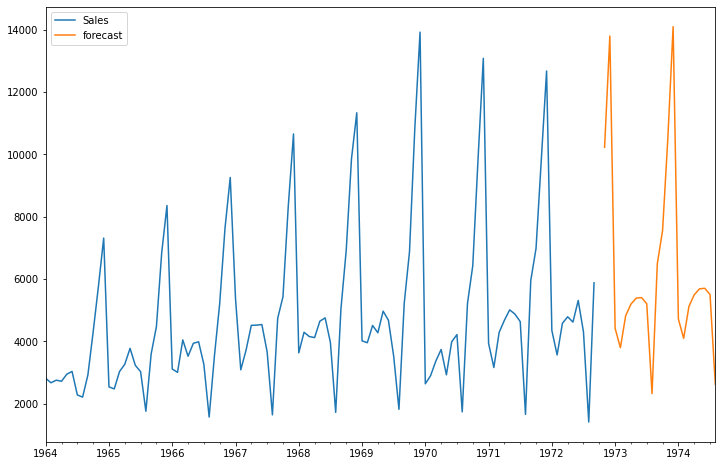

In [48]:
future_df['forecast'] = results2.predict(start = 106, end = 130, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

In [49]:
future_df['forecast'][106:]

1972-11-01    10221.615608
1972-12-01    13792.217841
1973-01-01     4416.756278
1973-02-01     3798.822809
1973-03-01     4821.054292
1973-04-01     5194.445072
1973-05-01     5385.492975
1973-06-01     5404.218338
1973-07-01     5204.478449
1973-08-01     2324.472330
1973-09-01     6488.047770
1973-10-01     7556.029637
1973-11-01    10519.916792
1973-12-01    14090.519025
1974-01-01     4715.057462
1974-02-01     4097.123993
1974-03-01     5119.355475
1974-04-01     5492.746255
1974-05-01     5683.794159
1974-06-01     5702.519522
1974-07-01     5502.779633
1974-08-01     2622.773514
Name: forecast, dtype: float64